In this session, we will learn the basics of using a web API. We will use Python and Flask to create a simple backend that calls News API and render the new stories on a web page.

### What is an API?
An API, or Application Programming Interface, is a server that you can use to retrieve and send data to. APIs are most commonly used to retrieve data from a server.

When we want to receive data from an API, we need to make a request. Requests are used all over the web. 
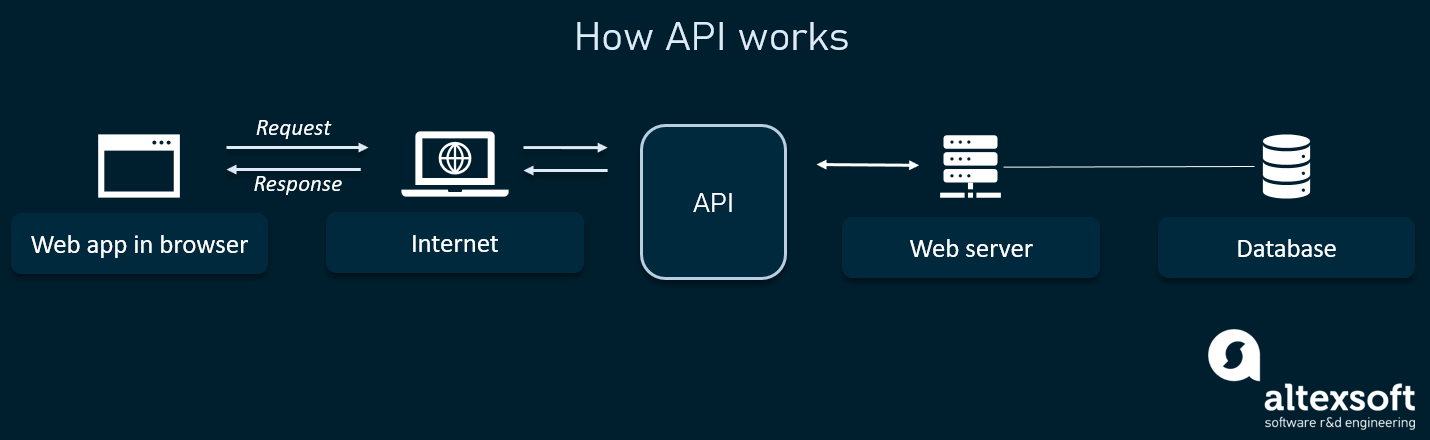

### Making API Requests in Python
In order to work with APIs in Python, we need tools that will make those requests. In Python, the most common library for making requests and working with APIs is the ```requests``` library. Install the library using the following command:

```pip install requests```

### Get API Key

Goto https://www.thenewsapi.com/ and signup. Once you registered you will get API Key.
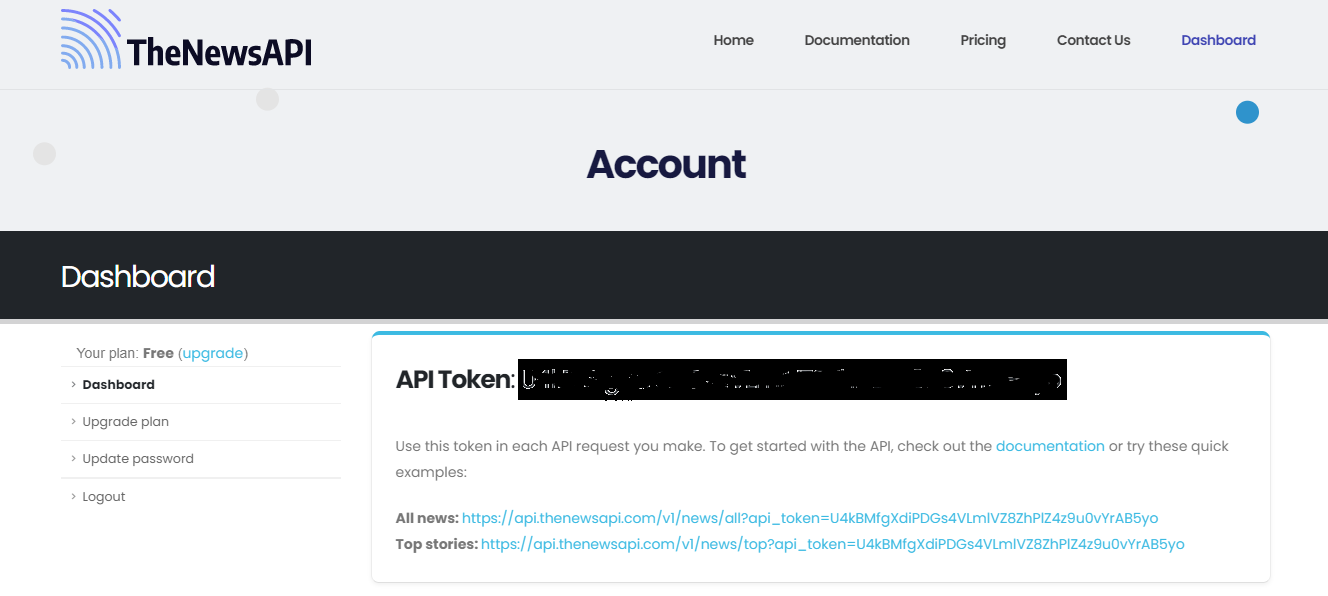


### Making Our First API Request
There are many different types of requests. The most commonly used one, a GET request, is used to retrieve data. Because we’ll just be working with retrieving data, our focus will be on making ‘get’ requests.

To make a ‘GET’ request, we’ll use the ``requests.get()`` function, which requires one argument — the URL we want to make the request to. 

Create a python script ``news.py`` and write the following code:

```
from flask import *
import requests

app = Flask(__name__)


@app.route('/')
def index():
	url = 'https://api.thenewsapi.com/v1/news/top?api_token=[YOUR_TOKEN]&locale=us&limit=5'
	response = requests.get(url).json()
	print(response['data'])
	return render_template('index.html',news=response['data'])
   
if __name__ == '__main__':
    app.run(debug=True)
```

### Working with JSON Data in Python
JSON (JavaScript Object Notation) is the language of APIs. JSON is a way to encode data structures that ensures that they are easily readable by machines. JSON is the primary format in which data is passed back and forth to APIs, and most API servers will send their responses in JSON format.

You might have noticed that the JSON output we received from the API looked like it contained Python dictionaries, lists, strings and integers. You can think of JSON as being a combination of these objects represented as strings. 

``response.json()`` returns a JSON object of the result (if the result was written in JSON format, if not it raises an error). Python requests are generally used to fetch the content from a particular resource URI. Whenever we make a request to a specified URI through Python, it returns a response object. Now, this response object would be used to access certain features such as content, headers, etc.

### Create HTML Page:
Create index.html page:

```
<html>
   <body>
  
	<h1>News Stories</h1>
		<ul>
         {% for n in news %}
            <li>
				<h2>{{n['title']}}</h2>
				<p>Source: {{n['source']}} </p>
				<p>{{n['description']}}</p>
				<a href={{n['url']}} target="_blank">Read More </a>
			</li>
         {% endfor %}
      </ul>
   </body>
</html>
```

### Add Search Functionality
To search new on specific topic, add the following code in index.html:

```
<form action = {{url_for('searchnews')}} method="post">
         <label>Search</label>
		 <input type = "text" name = "searchnews" />
         <input type = "submit" value = "submit" />
</form>
```
In news.py add following lines of code:
```
@app.route('/searchnews',methods=['POST'])
def searchnews():
	query=request.form
	print(query['searchnews'])
	url = 'https://api.thenewsapi.com/v1/news/all?api_token=YOURTOKEN&search='+query['searchnews']
	response = requests.get(url).json()
	print(response['data'])
	return render_template('index.html',news=response['data'])

```  